# Factors influencing housing prices in Utrecht, Netherlands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# loading Neighbourhood data for the city of Utrecht

In [2]:
Neighbourhoods_netherlands = pd.read_csv("D:\\Coursera_Capstone\\WijkenEnBuurten2020.csv")
Neighbourhoods_netherlands['Codering_3']=Neighbourhoods_netherlands['Codering_3'].apply(lambda x : x.rstrip())
Neighbourhoods_netherlands['Gemeentenaam_1']=Neighbourhoods_netherlands['Gemeentenaam_1'].apply(lambda x : x.rstrip())
Neighbourhoods_netherlands['SoortRegio_2']=Neighbourhoods_netherlands['SoortRegio_2'].apply(lambda x : x.rstrip())

Neighbourhoods_prep = Neighbourhoods_netherlands[(Neighbourhoods_netherlands['Gemeentenaam_1']=='Utrecht')& (Neighbourhoods_netherlands['SoortRegio_2']=='Wijk')]
Neighbourhoods_prep = Neighbourhoods_prep.reset_index(drop=True)
Neighbourhoods_prep

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,AfstandTotKinderdagverblijf_107,AfstandTotSchool_108,ScholenBinnen3Km_109,OppervlakteTotaal_110,OppervlakteLand_111,OppervlakteWater_112,MeestVoorkomendePostcode_113,Dekkingspercentage_114,MateVanStedelijkheid_115,Omgevingsadressendichtheid_116
0,14564,Wijk 01 West,Utrecht,Wijk,WK034401,1,29270,14210,15055,4600,...,0.3,NaN,NaN,898,810,88,.,NaN,1.0,3707.0
1,14576,Wijk 02 Noordwest,Utrecht,Wijk,WK034402,1,45255,22060,23195,6240,...,0.3,NaN,NaN,453,440,14,.,NaN,1.0,4030.0
2,14590,Wijk 03 Overvecht,Utrecht,Wijk,WK034403,1,34295,17200,17095,6425,...,0.4,NaN,NaN,848,818,30,.,NaN,1.0,3276.0
3,14601,Wijk 04 Noordoost,Utrecht,Wijk,WK034404,1,39680,18780,20895,6215,...,0.3,NaN,NaN,507,498,9,.,NaN,1.0,4531.0
4,14613,Wijk 05 Oost,Utrecht,Wijk,WK034405,1,32080,14905,17170,3450,...,0.4,NaN,NaN,1104,1074,30,.,NaN,1.0,3545.0
5,14627,Wijk 06 Binnenstad,Utrecht,Wijk,WK034406,1,19165,9815,9345,950,...,0.3,NaN,NaN,271,260,11,.,NaN,1.0,5642.0
6,14639,Wijk 07 Zuid,Utrecht,Wijk,WK034407,1,27895,13685,14210,4445,...,0.5,NaN,NaN,473,459,14,.,NaN,1.0,3263.0
7,14648,Wijk 08 Zuidwest,Utrecht,Wijk,WK034408,1,38620,19430,19190,6095,...,0.4,NaN,NaN,555,506,49,.,NaN,1.0,3555.0
8,14656,Wijk 09 Leidsche Rijn,Utrecht,Wijk,WK034409,1,41290,20685,20605,10170,...,0.5,NaN,NaN,1126,1047,79,.,NaN,2.0,1958.0
9,14672,Wijk 10 Vleuten-De Meern,Utrecht,Wijk,WK034410,1,49795,24465,25330,11890,...,0.6,NaN,NaN,3685,3471,214,.,NaN,2.0,1501.0


# loading Housing data for the city of Utrecht

In [3]:
url = "https://www.utrecht-monitor.nl/fysieke-leefomgeving/wonen/koopwoningmarkt#:~:text=Appartementen%20waren%20het%20duurst%20in,4.866%2C%2D%20per%20m2)."
html_scrape = pd.read_html(url)
Prices = html_scrape[1]
Prices.iloc[0,0]= 'Neighbourhood'
Prices.columns = Prices.iloc[0]
Prices = Prices[1:]
Prices = Prices.reset_index(drop=True)
Prices = Prices.drop(Prices.columns[[1, 2]], axis=1) 
Prices.rename(columns = {'transactieprijs2019-Q3' : 'Price_2019Q3', 'prijs / m22019-Q3' : 'Price_per_m2'}, inplace = True)
Prices


,Neighbourhood,Price_2019Q3,Price_per_m2
0,West,341.181,4.219
1,Noordwest,309.690,4.015
2,Overvecht,274.954,2.908
3,Noordoost,445.016,4.788
4,Oost,507.770,4.887
5,Binnenstad,434.747,5.091
6,Zuid,327.887,3.802
7,Zuidwest,313.324,3.661
8,Leidsche rijn,415.235,3.673
9,Vleuten-De Meern,428.002,3.562


# Joining the datasets

In [4]:
Neighbourhoods = pd.merge(Neighbourhoods_prep, Prices, left_index=True, right_index=True)
Neighbourhoods

,ID,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3,IndelingswijzigingWijkenEnBuurten_4,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,...,OppervlakteTotaal_110,OppervlakteLand_111,OppervlakteWater_112,MeestVoorkomendePostcode_113,Dekkingspercentage_114,MateVanStedelijkheid_115,Omgevingsadressendichtheid_116,Neighbourhood,Price_2019Q3,Price_per_m2
0,14564,Wijk 01 West,Utrecht,Wijk,WK034401,1,29270,14210,15055,4600,...,898,810,88,.,NaN,1.0,3707.0,West,341.181,4.219
1,14576,Wijk 02 Noordwest,Utrecht,Wijk,WK034402,1,45255,22060,23195,6240,...,453,440,14,.,NaN,1.0,4030.0,Noordwest,309.690,4.015
2,14590,Wijk 03 Overvecht,Utrecht,Wijk,WK034403,1,34295,17200,17095,6425,...,848,818,30,.,NaN,1.0,3276.0,Overvecht,274.954,2.908
3,14601,Wijk 04 Noordoost,Utrecht,Wijk,WK034404,1,39680,18780,20895,6215,...,507,498,9,.,NaN,1.0,4531.0,Noordoost,445.016,4.788
4,14613,Wijk 05 Oost,Utrecht,Wijk,WK034405,1,32080,14905,17170,3450,...,1104,1074,30,.,NaN,1.0,3545.0,Oost,507.770,4.887
5,14627,Wijk 06 Binnenstad,Utrecht,Wijk,WK034406,1,19165,9815,9345,950,...,271,260,11,.,NaN,1.0,5642.0,Binnenstad,434.747,5.091
6,14639,Wijk 07 Zuid,Utrecht,Wijk,WK034407,1,27895,13685,14210,4445,...,473,459,14,.,NaN,1.0,3263.0,Zuid,327.887,3.802
7,14648,Wijk 08 Zuidwest,Utrecht,Wijk,WK034408,1,38620,19430,19190,6095,...,555,506,49,.,NaN,1.0,3555.0,Zuidwest,313.324,3.661
8,14656,Wijk 09 Leidsche Rijn,Utrecht,Wijk,WK034409,1,41290,20685,20605,10170,...,1126,1047,79,.,NaN,2.0,1958.0,Leidsche rijn,415.235,3.673
9,14672,Wijk 10 Vleuten-De Meern,Utrecht,Wijk,WK034410,1,49795,24465,25330,11890,...,3685,3471,214,.,NaN,2.0,1501.0,Vleuten-De Meern,428.002,3.562


# Cleaning 
1. drop columns
2. change data types

In [5]:
Neighbourhoods = Neighbourhoods.drop(labels=['ID', 
                            'Gemeentenaam_1', 
                            'IndelingswijzigingWijkenEnBuurten_4', 
                            'MeestVoorkomendePostcode_113', 
                            'Dekkingspercentage_114'],
                    axis=1)

Neighbourhoods[["AantalInwoners_5", "Mannen_6", "Vrouwen_7", "k_0Tot15Jaar_8", "OppervlakteTotaal_110", "OppervlakteLand_111", "OppervlakteWater_112", "Omgevingsadressendichtheid_116", "Price_2019Q3", "Price_per_m2"]] = Neighbourhoods[["AantalInwoners_5", "Mannen_6", "Vrouwen_7", "k_0Tot15Jaar_8", "OppervlakteTotaal_110", "OppervlakteLand_111", "OppervlakteWater_112", "Omgevingsadressendichtheid_116", "Price_2019Q3", "Price_per_m2"]].apply(pd.to_numeric)
Neighbourhoods

,WijkenEnBuurten,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,...,AfstandTotSchool_108,ScholenBinnen3Km_109,OppervlakteTotaal_110,OppervlakteLand_111,OppervlakteWater_112,MateVanStedelijkheid_115,Omgevingsadressendichtheid_116,Neighbourhood,Price_2019Q3,Price_per_m2
0,Wijk 01 West,Wijk,WK034401,29270,14210,15055,4600,4215,12025,5720,...,NaN,NaN,898,810,88,1.0,3707.0,West,341.181,4.219
1,Wijk 02 Noordwest,Wijk,WK034402,45255,22060,23195,6240,6390,19595,8545,...,NaN,NaN,453,440,14,1.0,4030.0,Noordwest,309.690,4.015
2,Wijk 03 Overvecht,Wijk,WK034403,34295,17200,17095,6425,4410,11095,7490,...,NaN,NaN,848,818,30,1.0,3276.0,Overvecht,274.954,2.908
3,Wijk 04 Noordoost,Wijk,WK034404,39680,18780,20895,6215,6585,13480,9140,...,NaN,NaN,507,498,9,1.0,4531.0,Noordoost,445.016,4.788
4,Wijk 05 Oost,Wijk,WK034405,32080,14905,17170,3450,8270,11270,5835,...,NaN,NaN,1104,1074,30,1.0,3545.0,Oost,507.770,4.887
5,Wijk 06 Binnenstad,Wijk,WK034406,19165,9815,9345,950,3255,9275,3635,...,NaN,NaN,271,260,11,1.0,5642.0,Binnenstad,434.747,5.091
6,Wijk 07 Zuid,Wijk,WK034407,27895,13685,14210,4445,4105,10265,6090,...,NaN,NaN,473,459,14,1.0,3263.0,Zuid,327.887,3.802
7,Wijk 08 Zuidwest,Wijk,WK034408,38620,19430,19190,6095,5730,15565,7245,...,NaN,NaN,555,506,49,1.0,3555.0,Zuidwest,313.324,3.661
8,Wijk 09 Leidsche Rijn,Wijk,WK034409,41290,20685,20605,10170,4045,15755,8705,...,NaN,NaN,1126,1047,79,2.0,1958.0,Leidsche rijn,415.235,3.673
9,Wijk 10 Vleuten-De Meern,Wijk,WK034410,49795,24465,25330,11890,5660,12865,13430,...,NaN,NaN,3685,3471,214,2.0,1501.0,Vleuten-De Meern,428.002,3.562


# Adding additional variables
1. children as percentage of population
2. address density
3. population density
4. average square meters per dwelling

In [6]:
Neighbourhoods['children_percentage'] = Neighbourhoods['k_0Tot15Jaar_8']/Neighbourhoods['AantalInwoners_5']*100
Neighbourhoods['address_density'] = Neighbourhoods['Omgevingsadressendichtheid_116']/Neighbourhoods['OppervlakteLand_111']
Neighbourhoods['population_density'] = Neighbourhoods['AantalInwoners_5']/Neighbourhoods['OppervlakteLand_111']
Neighbourhoods['square_meters_2019'] = Neighbourhoods['Price_2019Q3']/Neighbourhoods['Price_per_m2']
Neighbourhoods

,WijkenEnBuurten,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,...,OppervlakteWater_112,MateVanStedelijkheid_115,Omgevingsadressendichtheid_116,Neighbourhood,Price_2019Q3,Price_per_m2,children_percentage,address_density,population_density,square_meters_2019
0,Wijk 01 West,Wijk,WK034401,29270,14210,15055,4600,4215,12025,5720,...,88,1.0,3707.0,West,341.181,4.219,15.715750,4.576543,36.135802,80.867741
1,Wijk 02 Noordwest,Wijk,WK034402,45255,22060,23195,6240,6390,19595,8545,...,14,1.0,4030.0,Noordwest,309.690,4.015,13.788532,9.159091,102.852273,77.133250
2,Wijk 03 Overvecht,Wijk,WK034403,34295,17200,17095,6425,4410,11095,7490,...,30,1.0,3276.0,Overvecht,274.954,2.908,18.734509,4.004890,41.925428,94.550894
3,Wijk 04 Noordoost,Wijk,WK034404,39680,18780,20895,6215,6585,13480,9140,...,9,1.0,4531.0,Noordoost,445.016,4.788,15.662802,9.098394,79.678715,92.944027
4,Wijk 05 Oost,Wijk,WK034405,32080,14905,17170,3450,8270,11270,5835,...,30,1.0,3545.0,Oost,507.770,4.887,10.754364,3.300745,29.869646,103.902189
5,Wijk 06 Binnenstad,Wijk,WK034406,19165,9815,9345,950,3255,9275,3635,...,11,1.0,5642.0,Binnenstad,434.747,5.091,4.956953,21.700000,73.711538,85.395207
6,Wijk 07 Zuid,Wijk,WK034407,27895,13685,14210,4445,4105,10265,6090,...,14,1.0,3263.0,Zuid,327.887,3.802,15.934755,7.108932,60.773420,86.240663
7,Wijk 08 Zuidwest,Wijk,WK034408,38620,19430,19190,6095,5730,15565,7245,...,49,1.0,3555.0,Zuidwest,313.324,3.661,15.781978,7.025692,76.324111,85.584267
8,Wijk 09 Leidsche Rijn,Wijk,WK034409,41290,20685,20605,10170,4045,15755,8705,...,79,2.0,1958.0,Leidsche rijn,415.235,3.673,24.630661,1.870105,39.436485,113.050640
9,Wijk 10 Vleuten-De Meern,Wijk,WK034410,49795,24465,25330,11890,5660,12865,13430,...,214,2.0,1501.0,Vleuten-De Meern,428.002,3.562,23.877899,0.432440,14.346010,120.157777


# Adding coordinates of neighbourhoods

In [7]:
latitude = [52.1091, 52.1108, 52.1180, 52.1035, 52.0840, 52.0889, 52.0641, 52.0758, 52.0954, 52.1002]
longitude = [5.0668, 5.0902, 5.1080, 5.1351, 5.1547, 5.1175, 5.1245, 5.1003, 5.0457, 5.0021]
lat = np.asarray(latitude)
long = np.asarray(longitude)
Neighbourhoods['Latitude'] = lat
Neighbourhoods['Longitude'] = long
Neighbourhoods

,WijkenEnBuurten,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,...,Omgevingsadressendichtheid_116,Neighbourhood,Price_2019Q3,Price_per_m2,children_percentage,address_density,population_density,square_meters_2019,Latitude,Longitude
0,Wijk 01 West,Wijk,WK034401,29270,14210,15055,4600,4215,12025,5720,...,3707.0,West,341.181,4.219,15.715750,4.576543,36.135802,80.867741,52.1091,5.0668
1,Wijk 02 Noordwest,Wijk,WK034402,45255,22060,23195,6240,6390,19595,8545,...,4030.0,Noordwest,309.690,4.015,13.788532,9.159091,102.852273,77.133250,52.1108,5.0902
2,Wijk 03 Overvecht,Wijk,WK034403,34295,17200,17095,6425,4410,11095,7490,...,3276.0,Overvecht,274.954,2.908,18.734509,4.004890,41.925428,94.550894,52.1180,5.1080
3,Wijk 04 Noordoost,Wijk,WK034404,39680,18780,20895,6215,6585,13480,9140,...,4531.0,Noordoost,445.016,4.788,15.662802,9.098394,79.678715,92.944027,52.1035,5.1351
4,Wijk 05 Oost,Wijk,WK034405,32080,14905,17170,3450,8270,11270,5835,...,3545.0,Oost,507.770,4.887,10.754364,3.300745,29.869646,103.902189,52.0840,5.1547
5,Wijk 06 Binnenstad,Wijk,WK034406,19165,9815,9345,950,3255,9275,3635,...,5642.0,Binnenstad,434.747,5.091,4.956953,21.700000,73.711538,85.395207,52.0889,5.1175
6,Wijk 07 Zuid,Wijk,WK034407,27895,13685,14210,4445,4105,10265,6090,...,3263.0,Zuid,327.887,3.802,15.934755,7.108932,60.773420,86.240663,52.0641,5.1245
7,Wijk 08 Zuidwest,Wijk,WK034408,38620,19430,19190,6095,5730,15565,7245,...,3555.0,Zuidwest,313.324,3.661,15.781978,7.025692,76.324111,85.584267,52.0758,5.1003
8,Wijk 09 Leidsche Rijn,Wijk,WK034409,41290,20685,20605,10170,4045,15755,8705,...,1958.0,Leidsche rijn,415.235,3.673,24.630661,1.870105,39.436485,113.050640,52.0954,5.0457
9,Wijk 10 Vleuten-De Meern,Wijk,WK034410,49795,24465,25330,11890,5660,12865,13430,...,1501.0,Vleuten-De Meern,428.002,3.562,23.877899,0.432440,14.346010,120.157777,52.1002,5.0021


# Foursquare setup to iniate API calls using coordinates

In [8]:
CLIENT_ID = 'IGZLARW2W3UN1L3NRWFI5BEGNNTAXEGUWWOHTAKUNMCWVGRE' # your Foursquare ID
CLIENT_SECRET = 'RREOIBQAY4LI1SIT4TAGTIIJED0JVID3NPW3VTAFBK10QQSI' # your Foursquare Secret
ACCESS_TOKEN = 'V4HTSLLG3MVNCTAX2EYET5BDKWPMAIHHZ54QPEXGVQFJ2NGP' # removed
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IGZLARW2W3UN1L3NRWFI5BEGNNTAXEGUWWOHTAKUNMCWVGRE
CLIENT_SECRET:RREOIBQAY4LI1SIT4TAGTIIJED0JVID3NPW3VTAFBK10QQSI


In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Search for venues in each neighbourhood
radius is 700m. diameter 1.4km. I don't have the actual spatial polygon data for a complete analysis. However, this should give us a good indicator. 

In [10]:
utrecht_venues = getNearbyVenues(Neighbourhoods['Neighbourhood'], Neighbourhoods['Latitude'], Neighbourhoods['Longitude'], radius=700)
utrecht_venues

West
Noordwest
Overvecht
Noordoost
Oost
Binnenstad
Zuid
Zuidwest
Leidsche rijn
Vleuten-De Meern


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West,52.1091,5.0668,fonQ,52.107630,5.061015,Furniture / Home Store
1,West,52.1091,5.0668,Bushalte Uraniumweg,52.109123,5.063746,Bus Stop
2,West,52.1091,5.0668,M.C. Utrecht - Motocross,52.114570,5.068817,Racetrack
3,Noordwest,52.1108,5.0902,IJssalon Roma,52.111163,5.089668,Ice Cream Shop
4,Noordwest,52.1108,5.0902,Julianapark,52.107307,5.086733,Park
...,...,...,...,...,...,...,...
244,Vleuten-De Meern,52.1002,5.0021,Station Vleuten,52.102871,5.007351,Train Station
245,Vleuten-De Meern,52.1002,5.0021,FLeiR Apotheek Vleuterweide,52.099495,5.005790,Pharmacy
246,Vleuten-De Meern,52.1002,5.0021,Busstation Vleuten,52.102898,5.007274,Bus Station
247,Vleuten-De Meern,52.1002,5.0021,Spoor 1,52.102909,5.007335,Platform


# Group and add venues to existing dataset

In [11]:
utrecht_venues_grouped2= utrecht_venues.groupby(['Neighbourhood'])['Venue']
utrecht_venues_grouped2.count()

Neighbourhoods = pd.merge(Neighbourhoods, utrecht_venues_grouped2.count(), how='left', left_on='Neighbourhood', right_on='Neighbourhood')
Neighbourhoods

,WijkenEnBuurten,SoortRegio_2,Codering_3,AantalInwoners_5,Mannen_6,Vrouwen_7,k_0Tot15Jaar_8,k_15Tot25Jaar_9,k_25Tot45Jaar_10,k_45Tot65Jaar_11,...,Neighbourhood,Price_2019Q3,Price_per_m2,children_percentage,address_density,population_density,square_meters_2019,Latitude,Longitude,Venue
0,Wijk 01 West,Wijk,WK034401,29270,14210,15055,4600,4215,12025,5720,...,West,341.181,4.219,15.715750,4.576543,36.135802,80.867741,52.1091,5.0668,3
1,Wijk 02 Noordwest,Wijk,WK034402,45255,22060,23195,6240,6390,19595,8545,...,Noordwest,309.690,4.015,13.788532,9.159091,102.852273,77.133250,52.1108,5.0902,24
2,Wijk 03 Overvecht,Wijk,WK034403,34295,17200,17095,6425,4410,11095,7490,...,Overvecht,274.954,2.908,18.734509,4.004890,41.925428,94.550894,52.1180,5.1080,23
3,Wijk 04 Noordoost,Wijk,WK034404,39680,18780,20895,6215,6585,13480,9140,...,Noordoost,445.016,4.788,15.662802,9.098394,79.678715,92.944027,52.1035,5.1351,23
4,Wijk 05 Oost,Wijk,WK034405,32080,14905,17170,3450,8270,11270,5835,...,Oost,507.770,4.887,10.754364,3.300745,29.869646,103.902189,52.0840,5.1547,7
5,Wijk 06 Binnenstad,Wijk,WK034406,19165,9815,9345,950,3255,9275,3635,...,Binnenstad,434.747,5.091,4.956953,21.700000,73.711538,85.395207,52.0889,5.1175,100
6,Wijk 07 Zuid,Wijk,WK034407,27895,13685,14210,4445,4105,10265,6090,...,Zuid,327.887,3.802,15.934755,7.108932,60.773420,86.240663,52.0641,5.1245,19
7,Wijk 08 Zuidwest,Wijk,WK034408,38620,19430,19190,6095,5730,15565,7245,...,Zuidwest,313.324,3.661,15.781978,7.025692,76.324111,85.584267,52.0758,5.1003,23
8,Wijk 09 Leidsche Rijn,Wijk,WK034409,41290,20685,20605,10170,4045,15755,8705,...,Leidsche rijn,415.235,3.673,24.630661,1.870105,39.436485,113.050640,52.0954,5.0457,20
9,Wijk 10 Vleuten-De Meern,Wijk,WK034410,49795,24465,25330,11890,5660,12865,13430,...,Vleuten-De Meern,428.002,3.562,23.877899,0.432440,14.346010,120.157777,52.1002,5.0021,7


# Exploratory analysis

Text(0.5, 1.0, 'Population density')

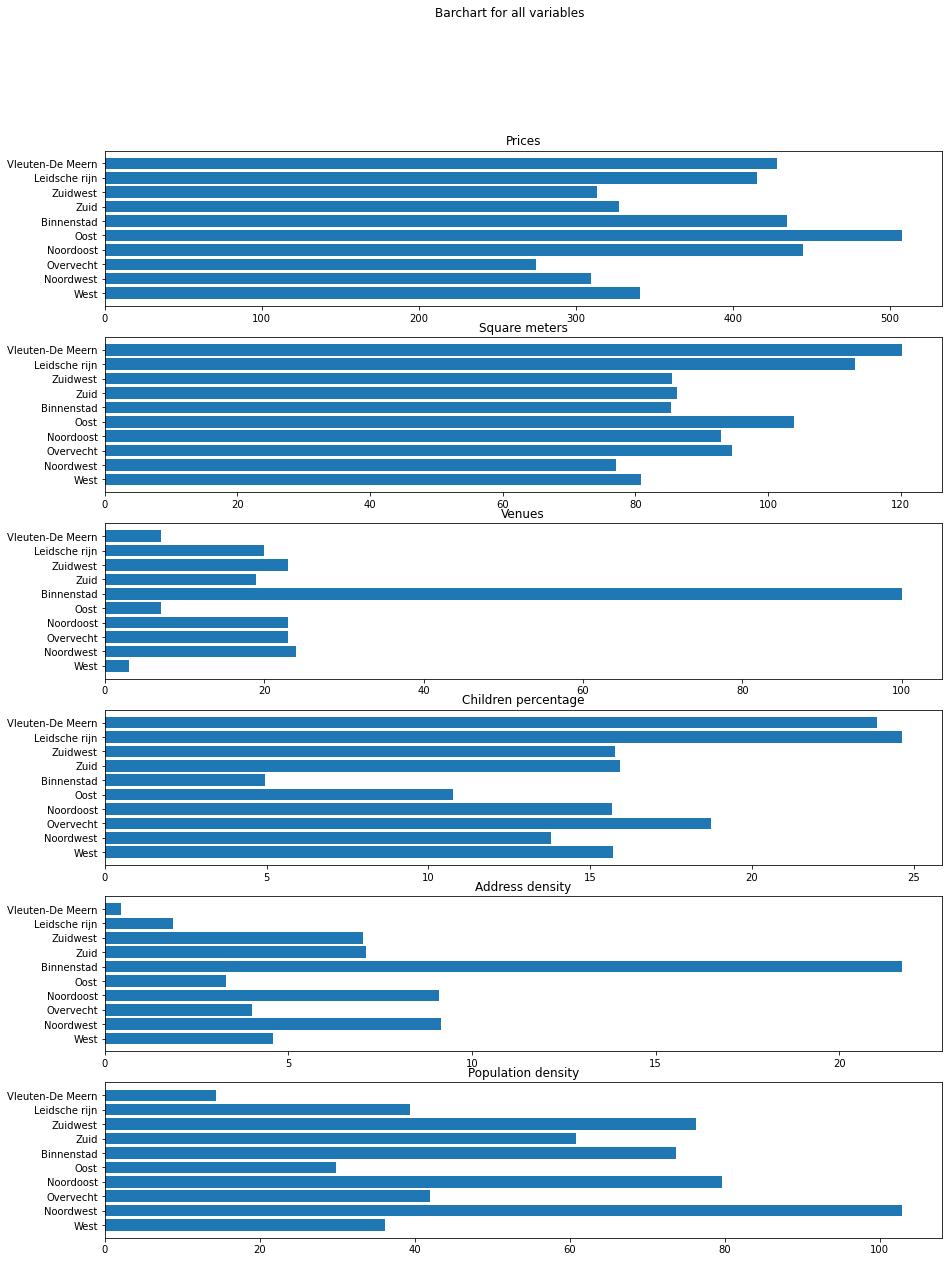

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(6)
fig.set_size_inches(15, 20)
fig.suptitle('Barchart for all variables')
axs[0].barh(Neighbourhoods['Neighbourhood'],Neighbourhoods['Price_2019Q3'])
axs[0].set_title('Prices')
axs[1].barh(Neighbourhoods['Neighbourhood'],Neighbourhoods['square_meters_2019'])
axs[1].set_title('Square meters')
axs[2].barh(Neighbourhoods['Neighbourhood'],Neighbourhoods['Venue'])
axs[2].set_title('Venues')
axs[3].barh(Neighbourhoods['Neighbourhood'],Neighbourhoods['children_percentage'])
axs[3].set_title('Children percentage')
axs[4].barh(Neighbourhoods['Neighbourhood'],Neighbourhoods['address_density'])
axs[4].set_title('Address density')
axs[5].barh(Neighbourhoods['Neighbourhood'],Neighbourhoods['population_density'])
axs[5].set_title('Population density')

# clustering

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler



X1=Neighbourhoods[['Price_2019Q3', 'square_meters_2019', 'Venue', 'children_percentage', 'address_density', 'population_density']]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X1)

scaled_features

array([[0.28446069, 0.08679912, 0.        , 0.54686168, 0.19485559,
        0.24619492],
       [0.14919937, 0.        , 0.21649485, 0.4489026 , 0.41032684,
        1.        ],
       [0.        , 0.40483058, 0.20618557, 0.70030298, 0.16797648,
        0.31160979],
       [0.73045667, 0.36748287, 0.20618557, 0.54417039, 0.40747286,
        0.73817042],
       [1.        , 0.62217859, 0.04123711, 0.29467812, 0.1348676 ,
        0.17539591],
       [0.68634888, 0.192029  , 1.        , 0.        , 1.        ,
        0.67074947],
       [0.2273598 , 0.21167955, 0.16494845, 0.55799356, 0.31392846,
        0.52456639],
       [0.16480826, 0.19642323, 0.20618557, 0.55022801, 0.31001448,
        0.70026797],
       [0.6025402 , 0.83481197, 0.17525773, 1.        , 0.06759896,
        0.28348813],
       [0.6573775 , 1.        , 0.04123711, 0.96173768, 0.        ,
        0.        ]])

In [14]:
kmeans = KMeans(
n_clusters=4,
n_init=10,
max_iter=500,
random_state=2)

In [15]:
kmeans.fit(scaled_features)

KMeans(max_iter=500, n_clusters=4, random_state=2)

In [16]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[0.86522833 0.49483073 0.12371134 0.41942425 0.27117023 0.45678316]
 [0.16516562 0.17994649 0.15876289 0.56085777 0.27942037 0.55652781]
 [0.62995885 0.91740599 0.10824742 0.98086884 0.03379948 0.14174407]
 [0.68634888 0.192029   1.         0.         1.         0.67074947]]
[1 1 1 0 0 3 1 1 2 2]


In [17]:
Neighbourhoods['Cluster'] = kmeans.labels_
Neighbourhoods[['Neighbourhood', 'Cluster']]

,Neighbourhood,Cluster
0,West,1
1,Noordwest,1
2,Overvecht,1
3,Noordoost,0
4,Oost,0
5,Binnenstad,3
6,Zuid,1
7,Zuidwest,1
8,Leidsche rijn,2
9,Vleuten-De Meern,2


# regression analysis

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

y = Neighbourhoods['Price_2019Q3']
X2 = Neighbourhoods[['Venue', 'children_percentage', 'address_density', 'population_density', 'square_meters_2019']]

scaler = MinMaxScaler()
X = scaler.fit_transform(X2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

regressor = LinearRegression()
regressor.fit(X_train, y_train)



coef_table = pd.DataFrame(list(X2.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",regressor.coef_.transpose())
coef_table
 

,0,Coefs
0,Venue,-538.558745
1,children_percentage,-203.656263
2,address_density,637.866379
3,population_density,-52.330406
4,square_meters_2019,338.110482


In [19]:
y_pred = regressor.predict(X_test)
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction

,Actual,Predicted
3,445.016,427.700114
8,415.235,316.532456
